# Inaugural Project

Imports packages and our Python file:

In [5]:
#Import different packages

import numpy as np
import matplotlib.pyplot as plt 


# Autoreload of our model 
%load_ext autoreload
%autoreload 2

# Import our code
import HouseholdSpecializationModel as model

# Initialize class
hsm = model.HouseholdSpecializationModelClass()

#Defining beta
beta = '\u03B2'

# Question 1

We are printing a tabel with the results based on the HouseholdSpecilizationModel code

In [2]:
hsm.print_table_q1()

Table of HF/HM values:
Alpha/Sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


Higher productive for women will lead to women are working more in the home. 

The most productive side in the home will have relative more work in the home for a higher 
degree of substitution. 

# Question 2

We are using our code from the HouseholdSpecializationModel and printing results.

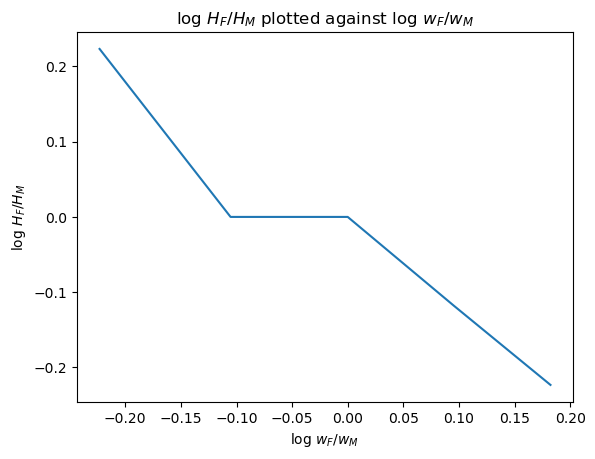

In [3]:
# a. First we create a figure object by initializing the plt.figure
fig = plt.figure() 

# b. We only add one subplot so the ax is basically the entire figure.
ax = fig.add_subplot(1,1,1) 
ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=True)) 

#x-axis: we plot log(wF_vec), since wM is fixed at 1 (i.e. a numeraire)
# Note: we only take the log here, so we don't need to store the log values

#y-axis: We call the solve_wF_vec method from our class directly as the returns the value. 
#Note: Here we call the discrete solving method.

# c. Title and axis-labels
ax.set_title('log $H_F/H_M$ plotted against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #labelling x-axis
ax.set_ylabel('log $H_F/H_M$'); #labelling y-axis

**Note:** We see that a higher relative for women does that the work more at home. 

If the wage is the same the hours in the home is the same. 

# Question 3

We are using the code for continuous as the hours are not longer discrete

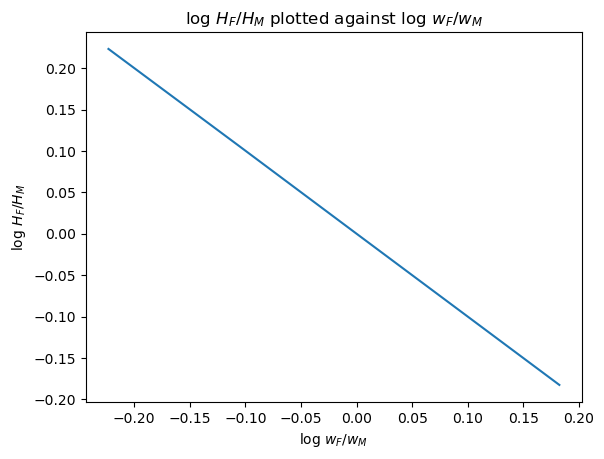

In [4]:
# a. create the figure
fig = plt.figure() 

# b. plot
ax = fig.add_subplot(1,1,1) 
ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=False)) 
#We call discrete = False, because we want it to use the continous solving method.

ax.set_title('log $H_F/H_M$ plotted against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #labelling x-axis
ax.set_ylabel('log $H_F/H_M$'); #labelling y-axis

**Note:** We have made an initial guess that men and women work 6 hours at work and at home each. To test whether we have just found a local minima, we change the initial guess to various values, and see that we get the same solution. Thus, our results are robust to the initial guess.

# Question 4

We are solving this question by looping over different values for alpha and sigma, 
and then returning the minimum value for the target function

**Problem:** Finding the $\alpha$ and $\sigma$ that minimizes the target function given in question 4.

**Inputs:** AA vector for the wage for woman, wF_Vec. Further, the $\beta_0$ and $\beta_1$ from the empirical study.

**Outputs:** The optimal $\alpha$, $\sigma$, $\hat{\beta_0}$, $\hat{\beta_1}$ and value of target function.

**Algorithm:** `numerical_solution()`

1. Defining the target function as: $(\beta_0-\hat{\beta_0})^2+(\beta_1-\hat{\beta_1})^2$
2. We use the function solve_wF_vec to solve for the wage for given values of $\alpha$ and $\sigma$. We are doing it in the continuous case as in question 3. The method is the same, the only different is that values of $\alpha$ and $\sigma$ can change. 
3. Running a regression based on the solution from step 2. The results are $\hat{\beta_0}$ and $\hat{\beta_1}$. 
4. Minimizing the target function defined in step 1 with respect to $\alpha$ and $\sigma$. This is done with the Nelder-Mead function in scipy. The $\alpha$ and $\sigma$ will change the estimates in the step 3 and hereby we can find the optimal $\hat{\beta_0}$ and $\hat{\beta_1}$. 
5. In order to avoid finding local minima for our results  we are using different initial guess for the function. We are looping over 10 different seeds, which determines the initial guess (1 to 10)
  * If the target function from the new seed is lower. We keep the values
  * If target function from the new seed is higher, we discard the values. 
6. Saving the values. 

In [5]:

#Setting initial values. 
target_best=10**6
alpha_best=np.nan
sigma_best=np.nan

beta0_best=0
beta1_best=1

#Making the loop with different initial seeds in order to decrease the risk of local minima. Step 5 in the described algorithm. 
for i in [1,2,3,4,5,6,7,8,9,10]:   
    alpha,sigma,target=hsm.solve_optimal_alpha_sigma(i)
    if target<target_best:
        target_best=target
        alpha_best=alpha
        sigma_best=sigma
        log_HF_HM_best=hsm.solve_wF_vec(discrete=False)

#Note: We get an error, but the target function seems to be close to zero, so we ignore the error. 

#Restore originally values
hsm.par.alpha=0.5
hsm.par.sigma=1


c:\Users\Ander\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:84: RuntimeWarning: overflow encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [6]:
#Calculating the estimated value of beta0 and beta1 for the optimal values of alpha and sigma
beta0_best,beta1_best = hsm.run_regression(alpha_best, sigma_best)

#Printing results. 
print(f'The optimal value of alpha is: {alpha_best:.3f}')    
print(f'The optimal value of sigma is: {sigma_best:.3f}')
print(f'The value of the estimated beta0 is:  {beta0_best:.3f}')
print(f'The value of the estimated beta1 is: {beta1_best:.3f}')
print(f'Target function value:  {target_best:.5f}')

The optimal value of alpha is: 0.982
The optimal value of sigma is: 0.100
The value of the estimated beta0 is:  0.400
The value of the estimated beta1 is: -0.100
Target function value:  0.00000


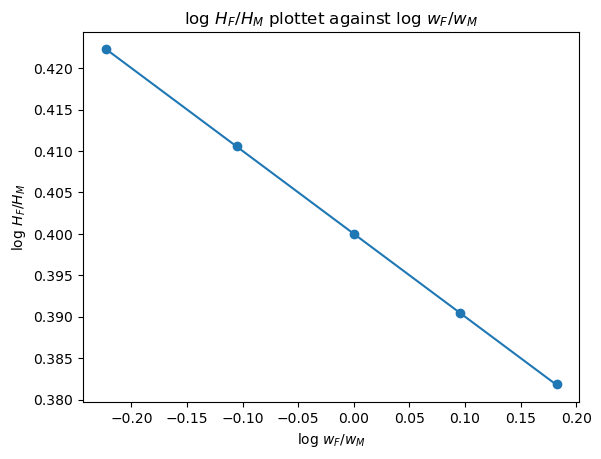

In [7]:
# a. create a figure
fig = plt.figure() 

# b. plot
ax = fig.add_subplot(1,1,1) 


ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec)) 
#x-axis: Same as in question 2 and 3
#y-axis: We are plotting the function from the paper.

ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best) 
#We are making our vector as a scatter plot to compare the results. 

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

We can see our estimates are in line with the empirical paper. Interestingly in order to get this, 
we get a value of alpha equal to 0.98. Which suggest that women are far more productive at home than men. 
Further, we get a low elasticity of substitution. One option could therefore be that our model have left out
important factors. 

The low degree of substitution is also the reason for a flat slope compared to exercise 2 and 3
as it more difficult for households to react on changes in the relative wages. 

# Question 5

We are first assuming that alpha is equal to 1/2. Then we are checking whether this are fitting with the data or not. The first part is therefore a simplication of question 4, and therefore explaninations can be found in question 4

After this we make an extension of the model

In [8]:

target_best_5=10**6

alpha_best_5=0
sigma_best_5=0


beta0_best_5=0
beta1_best_5=1

log_HF_HM_best_5=np.zeros(hsm.par.wF_vec.size)

for j, sigma in enumerate(np.linspace(0.0,1.5,100)): 
    hsm.par.sigma=sigma
    hsm.run_regression()
    target_new_5=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2
    if target_new_5<target_best_5:
        target_best_5=target_new_5
        sigma_best_5=sigma
        log_HF_HM_best_5=hsm.solve_wF_vec(discrete=False)
        beta0_best_5=hsm.opt.beta0
        beta1_best_5=hsm.opt.beta1
            
    else: 
        target_best_5=target_best_5
        sigma_best_5=sigma_best_5
        log_HF_HM_best_5=log_HF_HM_best_5
        beta0_best_5=beta0_best_5
        beta1_best_5=beta1_best_5

#Returning values
hsm.par.sigma=1.0
hsm.par.wF=1.0

TypeError: run_regression() missing 2 required positional arguments: 'alpha_optimal' and 'sigma_optimal'

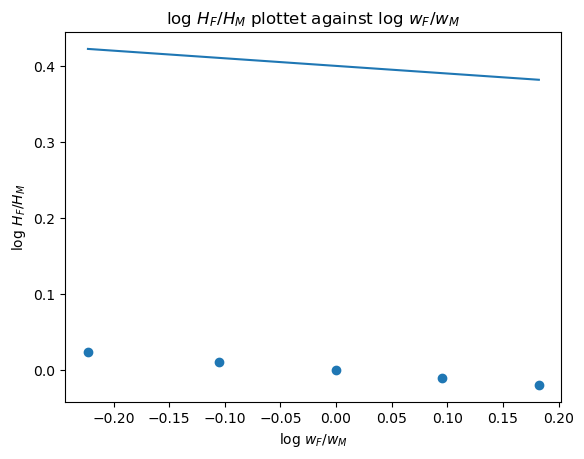

In [ ]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec))
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best_5) 


ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

If alpha is assumed to be 0.5, then we assume that productivity for working at home is the same for both men and women. If the productivity is different, which question 4 suggest, then this assumption will result in a poorer fit, because in question 4 we find that women are more productive than men, since alpha was 0.9.

However, it could also be that the productivity is the same, but the model is misspecified. One reason could be expectations for the society that the woman is expected to work more at home than the man. This is not taken care off in our model

In [1]:
import Q5



In [3]:
q5 = Q5.HouseholdSpecializationModelClass()

In [9]:

#Setting initial values. 
target_best=10**6
sigma_best=np.nan
psi_best=np.nan

beta0_best=0
beta1_best=1

#Making the loop with different initial seeds in order to decrease the risk of local minima. Step 5 in the described algorithm. 
for i in [1,2,3,4,5,6,7,8,9,10]:   
    sigma,psi,target=q5.solve_optimal_sigma(i)
    if target<target_best:
        target_best=target
        sigma_best=sigma
        psi_best=psi
        log_HF_HM_best=q5.solve_wF_vec()

#Note: We get an error, but the target function seems to be close to zero, so we ignore the error. 

#Restore originally values
q5.par.sigma=1

TypeError: solve_wF_vec() got an unexpected keyword argument 'discrete'

In [7]:
#Calculating the estimated value of beta0 and beta1 for the optimal values of alpha and sigma
beta0_best,beta1_best = q5.run_regression(sigma_best)

#Printing results.   
print(f'The optimal value of sigma is: {sigma_best:.3f}')
print(f'The value of the estimated beta0 is:  {beta0_best:.3f}')
print(f'The value of the estimated beta1 is: {beta1_best:.3f}')
print(f'Target function value:  {target_best:.5f}')

The optimal value of sigma is: 0.103
The value of the estimated beta0 is:  0.000
The value of the estimated beta1 is: -0.102
Target function value:  0.15998
